In [12]:
!pip install -U scikit-learn
!python -m pip show scikit-learn      # to know the version

!pip install -U install pandas
!pip install -U install numpy
!pip install -U install matplotlib
!pip install -U install seaborn


Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\user\appdata\local\programs\python\python310\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: mglearn, seqeval, sklearn


  Using cached numpy-1.26.1-cp310-cp310-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.1-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Rolling back uninstall of numpy
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy-1.24.2.dist-info\
   from C:\Users\USER\AppData\Local\Programs\Python\Python310\Lib\site-packages\~umpy-1.24.2.dist-info
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\.libs\
   from C:\Users\USER\AppData\Local\Programs\Python\Python310\Lib\site-packages\numpy\~libs
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\__config__.py
   from C:\Users\USER\AppData\Local\Temp\pip-uninstall-jaec7g20\__config__.py
  Moving to c:\users\user\appdata\local\programs\python\python310\lib\site-packages\numpy\__init__.c

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\numpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


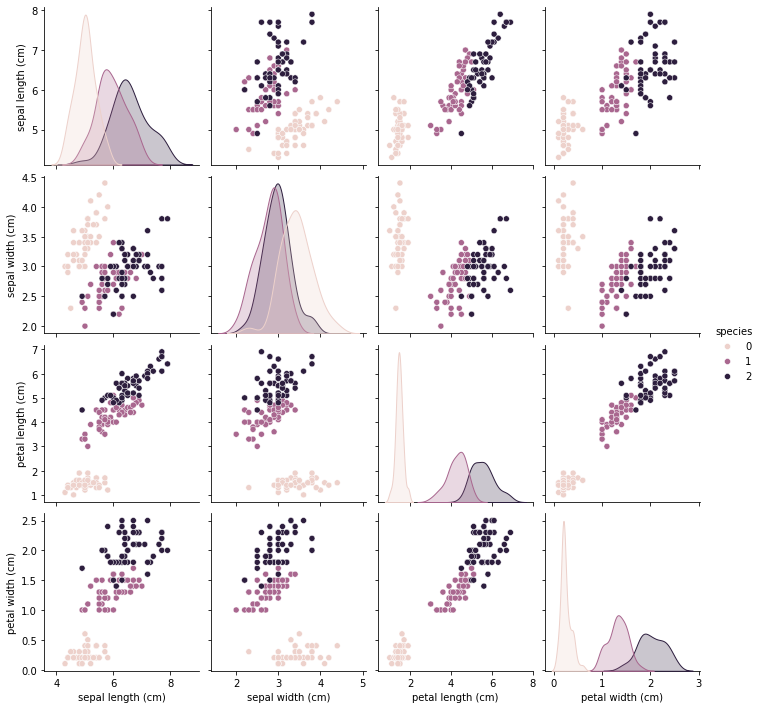

In [3]:
# Get iris data from sklearn. Load iris data
from sklearn.datasets import load_iris
import seaborn as sns	# Python data visualization library based on matplotlib
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
iris
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

# to show output of iris information
iris_df
iris_df.describe()
iris_df.info()


# pairplot, to visualize relationships between each variable
sns.pairplot(iris_df, hue= 'species')


In [4]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3)
len(x_train),len(x_test)



(105, 45)

In [19]:
# Building Machine Learning Models
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


Accuracy: 0.9333333333333333
Confusion matrix for Logistic Regression
 [[15  0  0]
 [ 0 14  2]
 [ 0  1 13]]
accuracy_LR : 0.933
precision_LR : 0.933
recall_LR : 0.933
f1-score_LR : 0.933


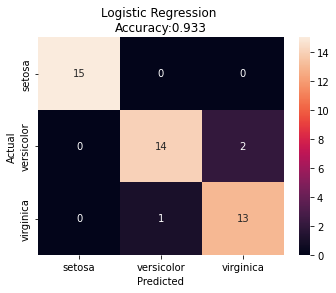

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression()

# Training/Fitting the Model
predModel = reg.fit(x_train,y_train)

# Making Predictions
y_predLR = predModel.predict(x_test)

print("Accuracy:", reg.score(x_test,y_test))

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_predLR) 
accuracyLR = accuracy_score(y_test,y_predLR)
precision = precision_score(y_test, y_predLR,average='micro')
recall =  recall_score(y_test, y_predLR,average='micro')
f1 = f1_score(y_test,y_predLR,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_LR : %.3f' %accuracyLR)
print('precision_LR : %.3f' %precision)
print('recall_LR : %.3f' %recall)
print('f1-score_LR : %.3f' %f1)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracyLR))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Confusion matrix for SVC
 [[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]
accuracy_SVC : 0.956
precision_SVC : 0.956
recall_SVC : 0.956
f1-score_SVC : 0.956


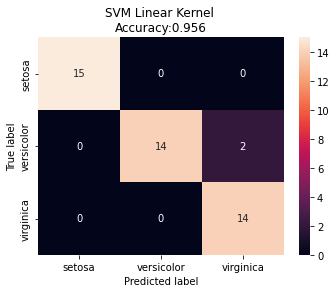

In [21]:
# Support Vector Classification
# Support Vector Classification
from sklearn.svm import SVC

# Training/Fitting the Model
clf = SVC(kernel = 'linear').fit(x_train,y_train)

# Making Predictions
y_predSVC = clf.predict(x_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_predSVC) 
accuracySVC = accuracy_score(y_test,y_predSVC)
precision = precision_score(y_test, y_predSVC,average='micro')
recall =  recall_score(y_test, y_predSVC,average='micro')
f1 = f1_score(y_test,y_predSVC,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC : %.3f' %accuracySVC)
print('precision_SVC : %.3f' %precision)
print('recall_SVC : %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracySVC))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


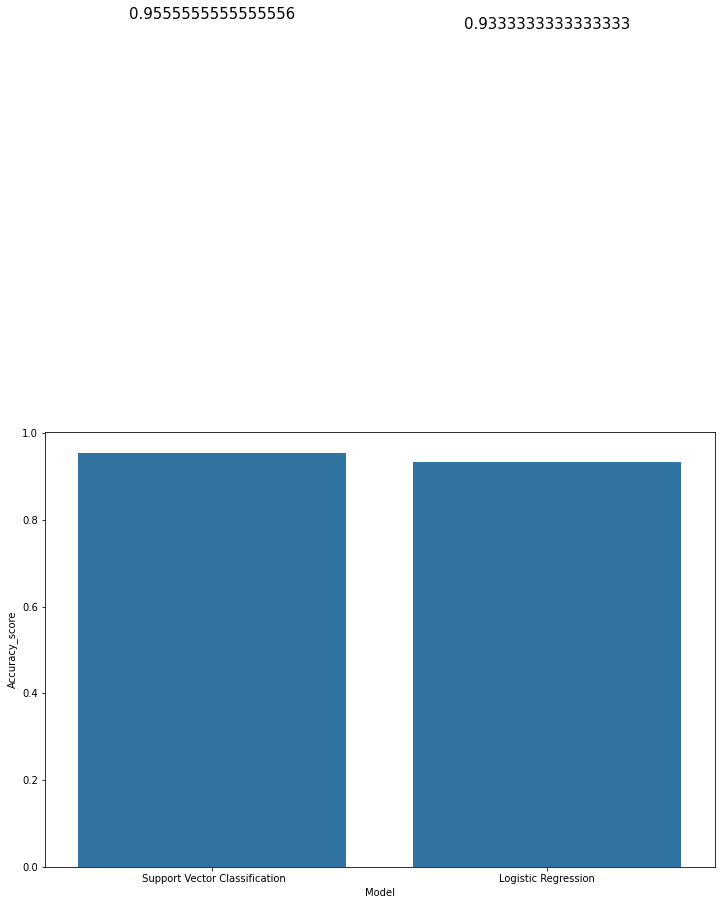

In [22]:
# Create a table for comparison
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              ' Support Vector Classification'],
    "Accuracy_score": [accuracyLR, 
              accuracySVC]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

# Plot bar chart to visualize
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')


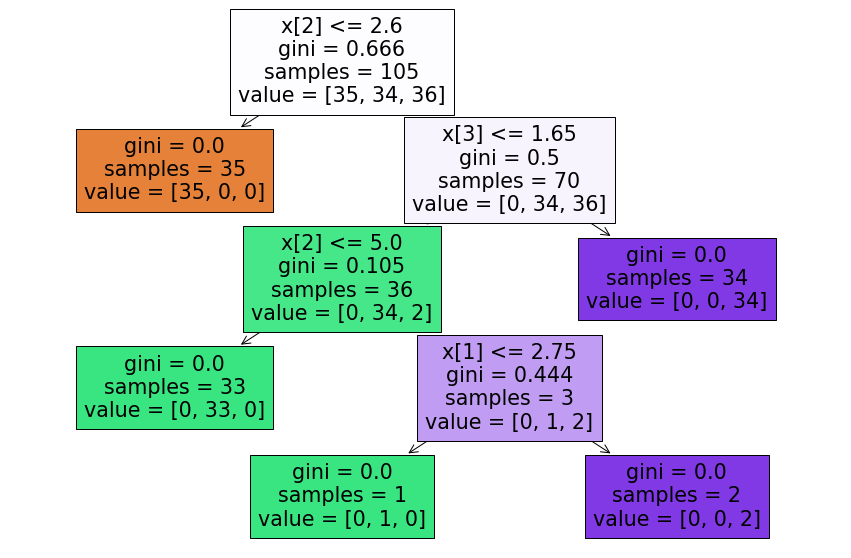

In [23]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB().fit(x_train, y_train)
y_predGNB = gaussian.predict(x_test)

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


# Random forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
#plot tree
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(x_train, y_train)  ,filled=True)
plt.show()
